Task 1 Introduction

In this project, I've been approached by the Category Manager for Chips, who wants a better understanding the types of customers who purchase Chips and their purchasing behavior within the region.

The goal of this analysis is to answer key questions such as:

- Examine transaction data: Look for inconsistencies, missing data, outliers, correctly identified category items, and numeric data across all tables.
- Examine customer data: Check for similar issues in customer data, look for nulls and merge data after cleaning.
- Define the Metrics: Total Sales, drivers of sales, where the highest sales are coming from, etc.
- Create charts and note any trends or insights.
- Define recommendation from my insights, determine which segments we should be targeting. If packet sizes are relative and form conclusion about the analysis.

Importing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


Data Exploration and Cleaning
- Look for inconsistencies, missing missing data, outliers
- Fix any data types of category that is incorrect.


Purchasing Behavior Key Attributes

* Loyalty Card Number: Identification method, likely used for merging data

* Lifestate: Can be used to identify spending patterns

* Premium Customer: Way to identify wealth, could be combined wiht lifestage (renamed to make clearer)

In [4]:
pd.set_option('display.max_columns', None)
customer_info = pd.read_csv("Dataset/QVI_purchase_behaviour.csv")
customer_info

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [5]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [6]:
print(f' Customer Status: {customer_info['PREMIUM_CUSTOMER'].unique()}')
print(f' Lifestages: {customer_info['LIFESTAGE'].unique()}')

 Customer Status: ['Premium' 'Mainstream' 'Budget']
 Lifestages: ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']


Transaction Data Key attributes

* Date: Needs to change type, but can be used for sales over time or which items are popular during certain times
* Store_Number: Identification for store, important when evaluating store profit
* Loyalty Card Number: Used for merging
* TXN_ID: Transaction ID
* Product Number/Product Name: For item identification
* Product quantity: Quantity of sale
* Tot Sales: Total Profit

Missing Data
* Product_Price: Calculate average price of product
* Product_Weight: Extract value from product_name

In [7]:
transaction_df = pd.read_excel("Dataset/QVI_transaction_data.xlsx")
transaction_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [22]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264834 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264834 non-null  int64  
 1   STORE_NBR       264834 non-null  int64  
 2   LYLTY_CARD_NBR  264834 non-null  int64  
 3   TXN_ID          264834 non-null  int64  
 4   PROD_NBR        264834 non-null  int64  
 5   PROD_NAME       264834 non-null  object 
 6   PROD_QTY        264834 non-null  int64  
 7   TOT_SALES       264834 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 18.2+ MB


Statistical Summary of Numerical Features

To get a general sense of the dataset’s scale and distributions, I used df.describe() to summarize the central tendency, spread, and range of all numeric attributes. This helped identify outliers and understand the typical values for features such as popularity, danceability, energy, and duration.

In [8]:
transaction_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


Sort the values to check if there are any outliers. I found 2 instances of Dorito Corn Chip which seems to be outliers due to the production quantity and total sale being much larger than others. These two orders are eliminated to remove bias.

In [9]:
transaction_df.sort_values(by="PROD_QTY", ascending=False).head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
217237,43603,201,201060,200202,26,Pringles Sweet&Spcy BBQ 134g,5,18.5
238333,43326,219,219004,218018,25,Pringles SourCream Onion 134g,5,18.5
238471,43604,261,261331,261111,87,Infuzions BBQ Rib Prawn Crackers 110g,5,19.0
228749,43604,232,232138,235978,109,Pringles Barbeque 134g,5,18.5
117802,43604,176,176471,177469,17,Kettle Sensations BBQ&Maple 150g,5,23.0
228711,43329,205,205149,204215,1,Smiths Crinkle Cut Chips Barbecue 170g,5,14.5
238397,43603,238,238337,243243,28,Thins Potato Chips Hot & Spicy 175g,5,16.5
238395,43604,238,238250,242874,88,Kettle Honey Soy Chicken 175g,5,27.0


In [10]:
transaction_df.drop(index=[69762,69763], inplace=True)

In [17]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264834 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264834 non-null  int64  
 1   STORE_NBR       264834 non-null  int64  
 2   LYLTY_CARD_NBR  264834 non-null  int64  
 3   TXN_ID          264834 non-null  int64  
 4   PROD_NBR        264834 non-null  int64  
 5   PROD_NAME       264834 non-null  object 
 6   PROD_QTY        264834 non-null  int64  
 7   TOT_SALES       264834 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 18.2+ MB


Handling Incorrect Datatype

Cleaned and enriched transaction level data by creating new features such as product price per unit, standardized date formats, extracted product weights from text fields using regex, and derived year/month columns for time based analysis. Ensured data consistency for further sales performance analysis.

In [18]:
transaction_df_cleaned = transaction_df.copy()
transaction_df_cleaned['PROD_PRICE_$'] = transaction_df_cleaned['TOT_SALES']/transaction_df_cleaned['PROD_QTY']
transaction_df_cleaned['DATE'] = pd.to_datetime(transaction_df_cleaned['DATE'], origin='1899-12-30', unit='D') # The original value are days since the excel value
transaction_df_cleaned['YEAR'] = pd.to_datetime(transaction_df_cleaned['DATE']).dt.year
transaction_df_cleaned['MONTH'] = pd.to_datetime(transaction_df_cleaned['DATE']).dt.month
transaction_df_cleaned['PROD_WEIGHT_G'] = transaction_df_cleaned['PROD_NAME'].str.extract(r'(?i)(\d{2,4})g')[0] # The (?i) allows us to ignore capitalization, the rest allows us to extract a number 2 to 4 digits followed by g
transaction_df_cleaned['PROD_WEIGHT_G'] = transaction_df_cleaned['PROD_WEIGHT_G'].str[0:3]
transaction_df_cleaned['PROD_WEIGHT_G'] = transaction_df_cleaned['PROD_WEIGHT_G'].astype(int)
transaction_df_cleaned.sample(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_PRICE_$,YEAR,MONTH,PROD_WEIGHT_G
141421,2019-03-13,103,103103,103183,46,Kettle Original 175g,2,10.8,5.4,2019,3,175
37451,2018-08-07,62,62166,58781,19,Smiths Crinkle Cut Snag&Sauce 150g,2,5.2,2.6,2018,8,150
150703,2018-08-17,123,123331,127452,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,5.4,2018,8,175
196015,2019-02-11,155,155039,155254,114,Kettle Sensations Siracha Lime 150g,2,9.2,4.6,2019,2,150
134617,2019-01-25,262,262002,261334,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4,2.7,2019,1,150
170919,2019-05-23,261,261081,260062,78,Thins Chips Salt & Vinegar 175g,2,6.6,3.3,2019,5,175
89785,2019-05-06,125,125192,129062,63,Kettle 135g Swt Pot Sea Salt,2,8.4,4.2,2019,5,135
82863,2018-12-08,26,26152,22942,26,Pringles Sweet&Spcy BBQ 134g,2,7.4,3.7,2018,12,134
100112,2018-10-03,4,4230,3690,23,Cheezels Cheese 330g,2,11.4,5.7,2018,10,330
123502,2019-01-28,88,88045,86446,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,3.8,2019,1,110


Merge the Dataset for further analysis
- Merge both the customer info and the transaction info on Loyalty Card Number

In [19]:
customer_transaction_merged = customer_info.merge(transaction_df_cleaned, on="LYLTY_CARD_NBR")
customer_transaction_merged

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_PRICE_$,YEAR,MONTH,PROD_WEIGHT_G
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,3.0,2018,10,175
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2.7,2018,9,150
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,3.6,2019,3,210
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,3.0,2019,3,175
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,1.9,2018,11,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,YOUNG FAMILIES,Mainstream,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,3.6,2018,12,210
264830,2370751,YOUNG FAMILIES,Premium,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,4.6,2018,10,150
264831,2370961,OLDER FAMILIES,Budget,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,4.2,2018,10,165
264832,2370961,OLDER FAMILIES,Budget,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,5.1,2018,10,300


Altering Category Order
- Changed the order of the attributes based on similar categories such as date, year, and month

In [20]:
title_order = ["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER", "DATE", "YEAR", "MONTH", "STORE_NBR", "TXN_ID", "PROD_NBR", "PROD_NAME", "PROD_QTY", "TOT_SALES", "PROD_PRICE_$", "PROD_WEIGHT_G"]
customer_transaction_merged = customer_transaction_merged[title_order]
customer_transaction_merged

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,YEAR,MONTH,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_PRICE_$,PROD_WEIGHT_G
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,2018,10,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,3.0,175
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,2018,9,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2.7,150
2,1003,YOUNG FAMILIES,Budget,2019-03-07,2019,3,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,3.6,210
3,1003,YOUNG FAMILIES,Budget,2019-03-08,2019,3,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,3.0,175
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,2018,11,1,5,96,WW Original Stacked Chips 160g,1,1.9,1.9,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,YOUNG FAMILIES,Mainstream,2018-12-08,2018,12,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,3.6,210
264830,2370751,YOUNG FAMILIES,Premium,2018-10-01,2018,10,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,4.6,150
264831,2370961,OLDER FAMILIES,Budget,2018-10-24,2018,10,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,4.2,165
264832,2370961,OLDER FAMILIES,Budget,2018-10-27,2018,10,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,5.1,300


Check for Missing Value

To ensure data completeness, I used customer_transaction_merged.isnull().sum() to identify missing values for each column. This step is critical before performing any analysis or visualizations, as null values can lead to errors or skewed results. In this dataset, there are no missing values and can now begin analysis.

In [21]:
customer_transaction_merged.isnull().sum() # No missing values, can begin analysis

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
YEAR                0
MONTH               0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PROD_PRICE_$        0
PROD_WEIGHT_G       0
dtype: int64

Topics to answer
1. Has the total sales of the store improved over the years, to evaluate the financial status of the company. (only 2 years so not useful)
2. Which item is the most popular based on each customer status and lifestage
3. Do premium customer tend to buy in a higher quantity or higher average price

1. Has the total sales of the store improved over the years, to evaluate the financial status of the company. (only 2 years so not useful)

[]

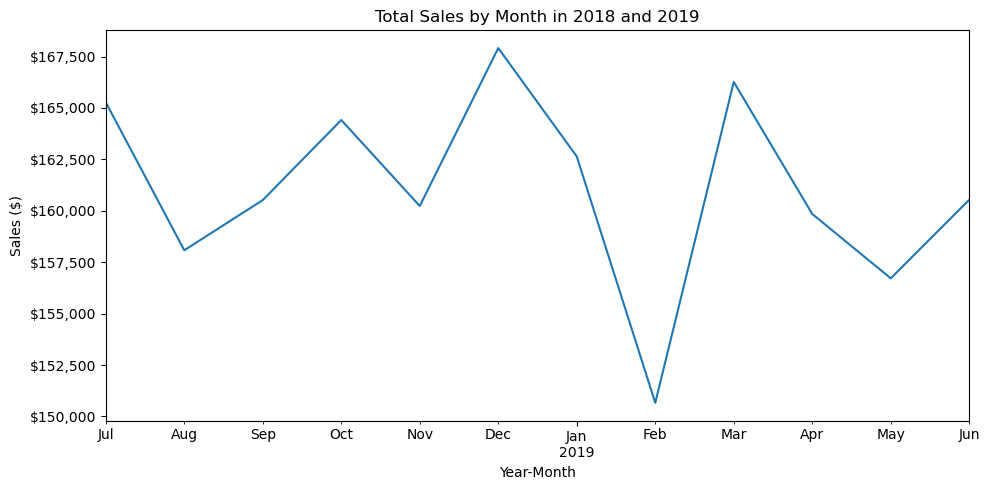

In [160]:
monthly_sales = customer_transaction_merged.groupby(
    customer_transaction_merged['DATE'].dt.to_period('M') # group by month
)['TOT_SALES'].sum()
monthly_sales.plot(kind='line', figsize=(10, 5))
plt.title('Total Sales by Month in 2018 and 2019')
plt.ylabel('Sales ($)')
plt.xlabel('Year-Month')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.tight_layout()
plt.plot()

Topic 1 Analysis

* Monthly sales from July 2018 to June 2019 fluctuated between $151,000 and $167,500, an approximate 10% variation. This reflects a stable financial performance throughout the year. Sales peaked in December, likely due to seasonal demand, which presents an opportunity for holiday promotions.
* The lowest sales occurred in February, potentially due to reduced demand following high volume holiday purchases. To avoid overstocking, bundling strategies or targeted promotions during slower months could help drive additional revenue.
* Overall, the consistent monthly range indicates steady and predictable market demand, offering a strong foundation for category planning and future promotional strategies.

2. How does customer status and lifestage affect their purchasing pattern of the top 5 items.

In [161]:
top_5_items = (
    customer_transaction_merged['PROD_NAME'].value_counts().head(5).index
    )
top_5_items

Index(['Kettle Mozzarella   Basil & Pesto 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Cobs Popd Swt/Chlli &Sr/Cream Chips 110g',
       'Tyrrells Crisps     Ched & Chives 165g',
       'Cobs Popd Sea Salt  Chips 110g'],
      dtype='object', name='PROD_NAME')

In [162]:
top_5_df = customer_transaction_merged[customer_transaction_merged["PROD_NAME"].isin(top_5_items)]
top_5_df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,YEAR,MONTH,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_PRICE_$,PROD_WEIGHT_G
37,1034,RETIREES,Premium,2019-03-24,2019,3,1,38,75,Cobs Popd Sea Salt Chips 110g,1,3.8,3.8,110
47,1046,YOUNG SINGLES/COUPLES,Budget,2019-02-13,2019,2,1,51,112,Tyrrells Crisps Ched & Chives 165g,1,4.2,4.2,165
92,1086,YOUNG SINGLES/COUPLES,Budget,2019-02-13,2019,2,1,97,75,Cobs Popd Sea Salt Chips 110g,1,3.8,3.8,110
106,1097,RETIREES,Budget,2019-01-24,2019,1,1,112,102,Kettle Mozzarella Basil & Pesto 175g,2,10.8,5.4,175
116,1104,RETIREES,Mainstream,2019-05-23,2019,5,1,122,112,Tyrrells Crisps Ched & Chives 165g,1,4.2,4.2,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264784,272390,NEW FAMILIES,Budget,2019-05-11,2019,5,272,270204,112,Tyrrells Crisps Ched & Chives 165g,2,8.4,4.2,165
264787,272392,MIDAGE SINGLES/COUPLES,Premium,2018-09-29,2018,9,272,270207,75,Cobs Popd Sea Salt Chips 110g,2,7.6,3.8,110
264801,883791,OLDER SINGLES/COUPLES,Mainstream,2018-09-29,2018,9,237,88100,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,3.8,110
264804,2330031,MIDAGE SINGLES/COUPLES,Premium,2018-07-07,2018,7,77,236716,102,Kettle Mozzarella Basil & Pesto 175g,1,5.4,5.4,175


In [163]:
top_5_premium = top_5_df.groupby("PREMIUM_CUSTOMER")["PROD_NAME"].value_counts()
top_5_premium

PREMIUM_CUSTOMER  PROD_NAME                               
Budget            Kettle Mozzarella   Basil & Pesto 175g      1166
                  Cobs Popd Sea Salt  Chips 110g              1132
                  Kettle Tortilla ChpsHny&Jlpno Chili 150g    1128
                  Tyrrells Crisps     Ched & Chives 165g      1108
                  Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    1091
Mainstream        Kettle Tortilla ChpsHny&Jlpno Chili 150g    1360
                  Tyrrells Crisps     Ched & Chives 165g      1324
                  Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    1313
                  Cobs Popd Sea Salt  Chips 110g              1298
                  Kettle Mozzarella   Basil & Pesto 175g      1282
Premium           Cobs Popd Swt/Chlli &Sr/Cream Chips 110g     865
                  Kettle Mozzarella   Basil & Pesto 175g       856
                  Tyrrells Crisps     Ched & Chives 165g       836
                  Cobs Popd Sea Salt  Chips 110g               835
   

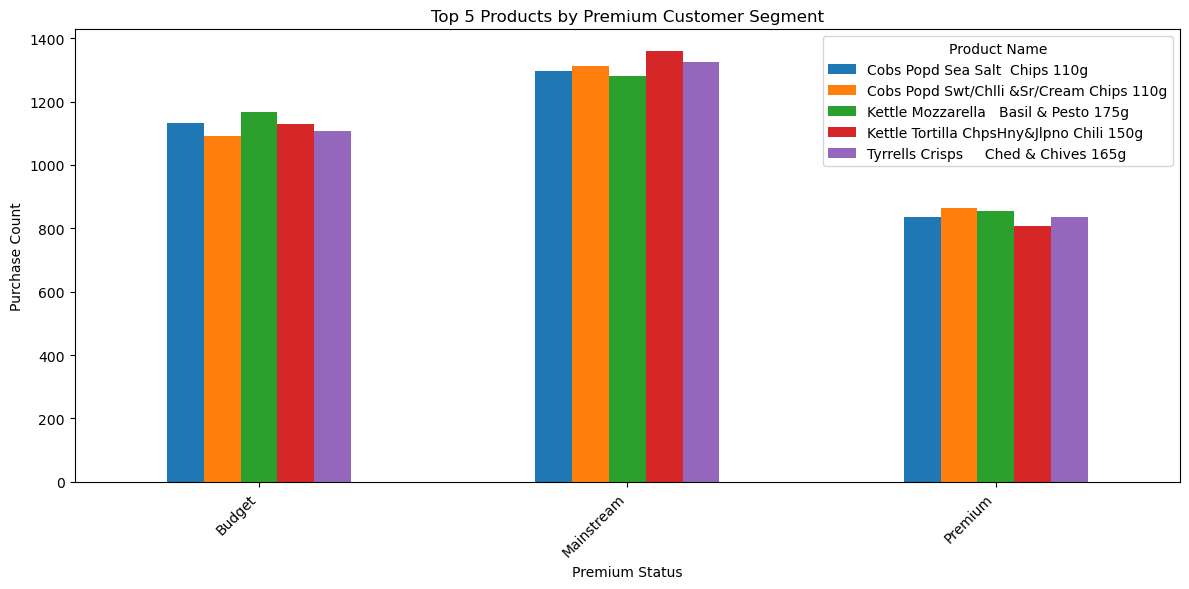

In [164]:
top_5_premium_unstacked = top_5_premium.unstack() # unstack makes PROD_NAME first row again
top_5_premium_unstacked.plot(kind='bar', figsize=(12, 6))
plt.title('Top 5 Products by Premium Customer Segment')
plt.xlabel('Premium Status')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Name')
plt.tight_layout()
plt.show()

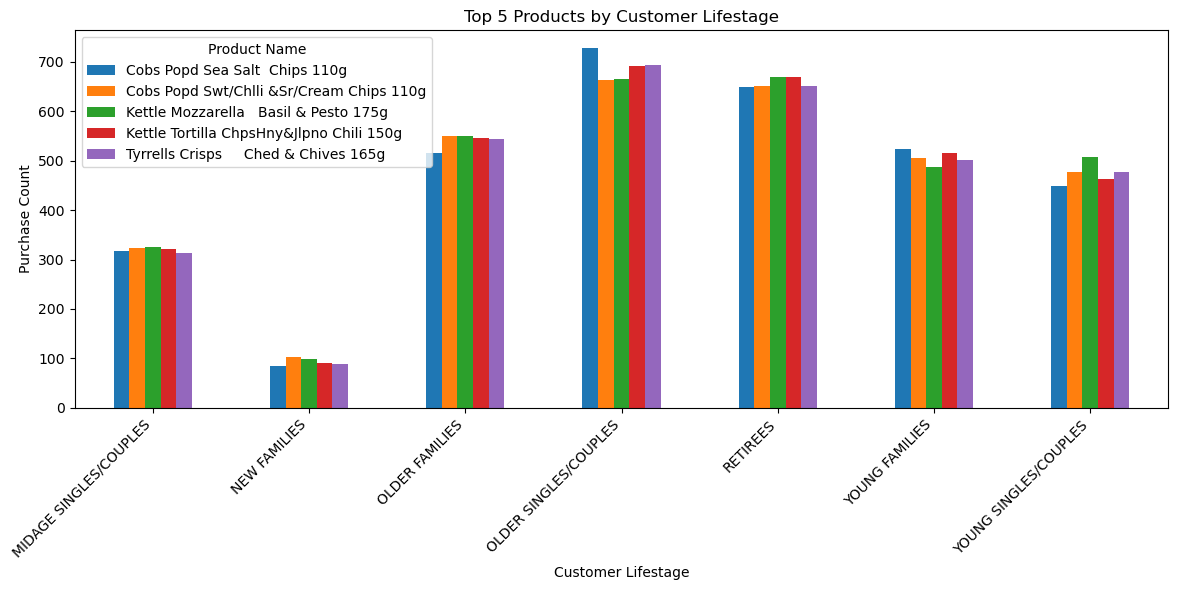

In [165]:
top_5_lifestage = top_5_df.groupby("LIFESTAGE")["PROD_NAME"].value_counts()
top_5_lifestage_unstacked = top_5_lifestage.unstack()
top_5_lifestage_unstacked.plot(kind="bar", figsize=(12,6))
plt.title('Top 5 Products by Customer Lifestage')
plt.xlabel('Customer Lifestage')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Name')
plt.tight_layout()
plt.show()

Topic 2 Anaysis:
Top 5 Chips:
* Two of the top selling chips are from the brands Cobs Popped and Kettle, suggesting these two brands are key drivers of chip sales. 
* Two of the top chips have Chili flavor, suggesting a potential trend towards spicy chips.
* The store manager could inquire about more Spicy chips from these top brands to boost sale while the flavor is trending.

Premium Customer
* Purchase distribution across all premium customer segments is relatively even, suggesting the top five chips have broad appeal regardless of price sensitivity.
* The Mainstream segment accounts for the highest number of purchases, followed by Budget customers, implying that the majority of buyers fall into middle or lower-income tiers.
* While price cuts may not be feasible, promotional bundles or markdowns on soon-to-expire products could appeal to these cost-conscious segments and help drive volume.

Customer Lifestage
* Similar to Premium Customer, the purchase pattern for the top 5 chips are distributed evenly.
* However, there is notable polarization in customer ages, with most purchases coming from either younger or older lifestage groups.



3. Do customers tend to buy in a higher quantity or higher average price

In [166]:
customer_quartile_df = customer_transaction_merged.copy()
customer_quartile_df["PRICE_QUARTILE"] = pd.qcut(customer_quartile_df["PROD_PRICE_$"], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
customer_quartile_df["WEIGHT_QUARTILE"] = pd.qcut(customer_quartile_df["PROD_WEIGHT_G"], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
customer_quartile_df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,YEAR,MONTH,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_PRICE_$,PROD_WEIGHT_G,PRICE_QUARTILE,WEIGHT_QUARTILE
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,2018,10,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,3.0,175,Q1,Q3
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,2018,9,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2.7,150,Q1,Q1
2,1003,YOUNG FAMILIES,Budget,2019-03-07,2019,3,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,3.6,210,Q2,Q4
3,1003,YOUNG FAMILIES,Budget,2019-03-08,2019,3,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,3.0,175,Q1,Q3
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,2018,11,1,5,96,WW Original Stacked Chips 160g,1,1.9,1.9,160,Q1,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,YOUNG FAMILIES,Mainstream,2018-12-08,2018,12,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,3.6,210,Q2,Q4
264830,2370751,YOUNG FAMILIES,Premium,2018-10-01,2018,10,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,4.6,150,Q3,Q1
264831,2370961,OLDER FAMILIES,Budget,2018-10-24,2018,10,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,4.2,165,Q3,Q2
264832,2370961,OLDER FAMILIES,Budget,2018-10-27,2018,10,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,5.1,300,Q4,Q4


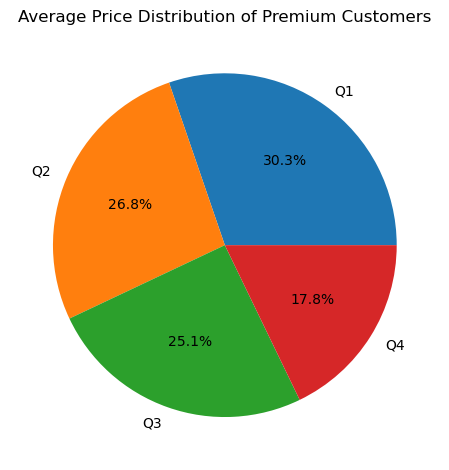

In [167]:
customer_quartile_df_average_price = customer_quartile_df["PRICE_QUARTILE"].value_counts().copy()
customer_quartile_df_average_price.plot(
    kind="pie",
    autopct='%1.1f%%',
    ylabel=''
)
plt.title("Average Price Distribution of Premium Customers")
plt.tight_layout()
plt.show()

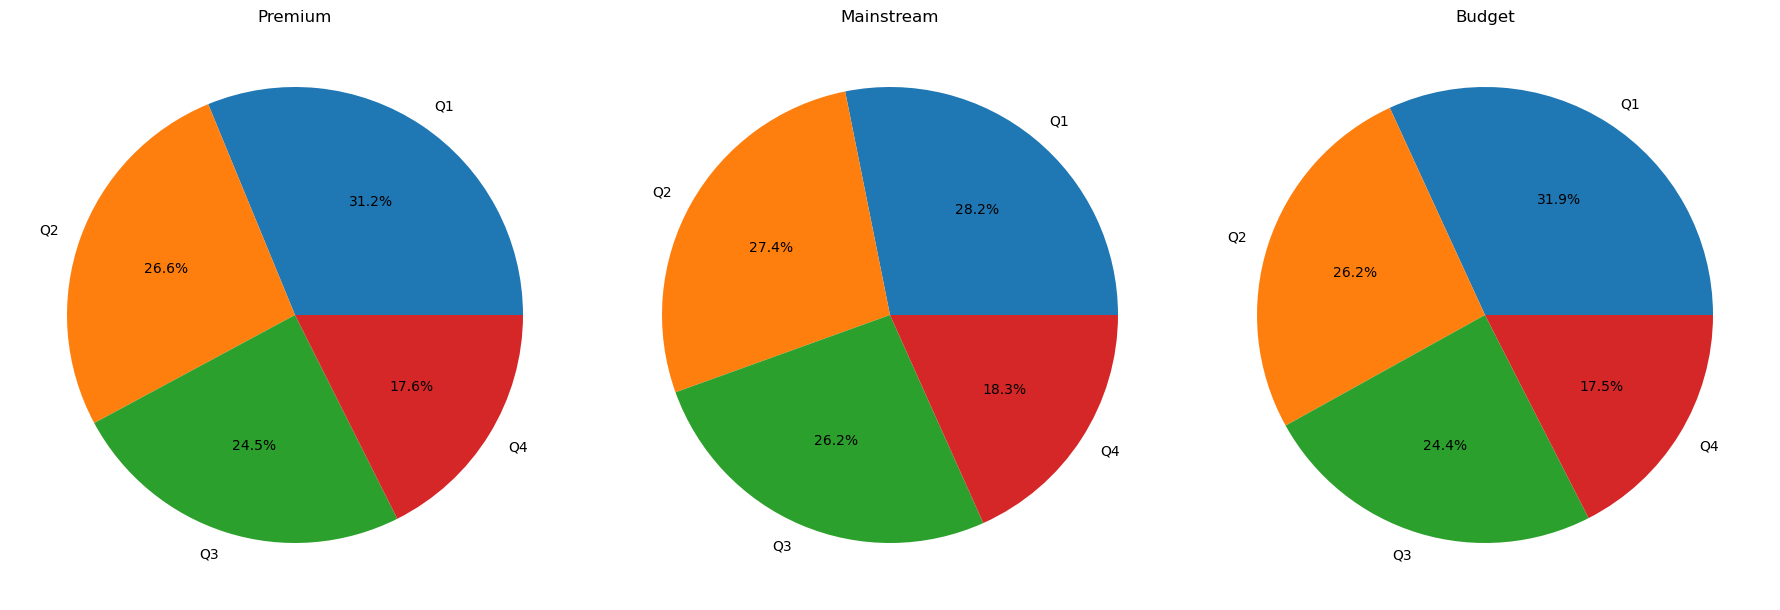

In [168]:
customer_quartile_df_customers = customer_quartile_df.groupby("PREMIUM_CUSTOMER")
customer_quartile_df_customers = customer_quartile_df_customers["PRICE_QUARTILE"].value_counts()
customer_quartile_df_customers_unstack = customer_quartile_df_customers.unstack()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
segments = customer_quartile_df["PREMIUM_CUSTOMER"].unique()
for i, segment in enumerate(segments):
    data = customer_quartile_df[customer_quartile_df["PREMIUM_CUSTOMER"] == segment]["PRICE_QUARTILE"].value_counts().sort_index()
    data.plot(
        kind='pie',
        autopct='%1.1f%%',
        ylabel='',
        ax=axes[i],
        title=segment
    )
plt.tight_layout()
plt.show()

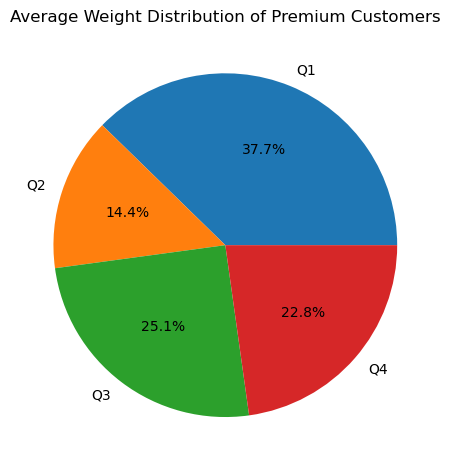

In [169]:
customer_quartile_df_average_weight = customer_quartile_df["WEIGHT_QUARTILE"].value_counts().sort_index().copy()
customer_quartile_df_average_weight.plot(
    kind="pie",
    autopct='%1.1f%%',
    ylabel=''
)
plt.title("Average Weight Distribution of Premium Customers")
plt.tight_layout()
plt.show()

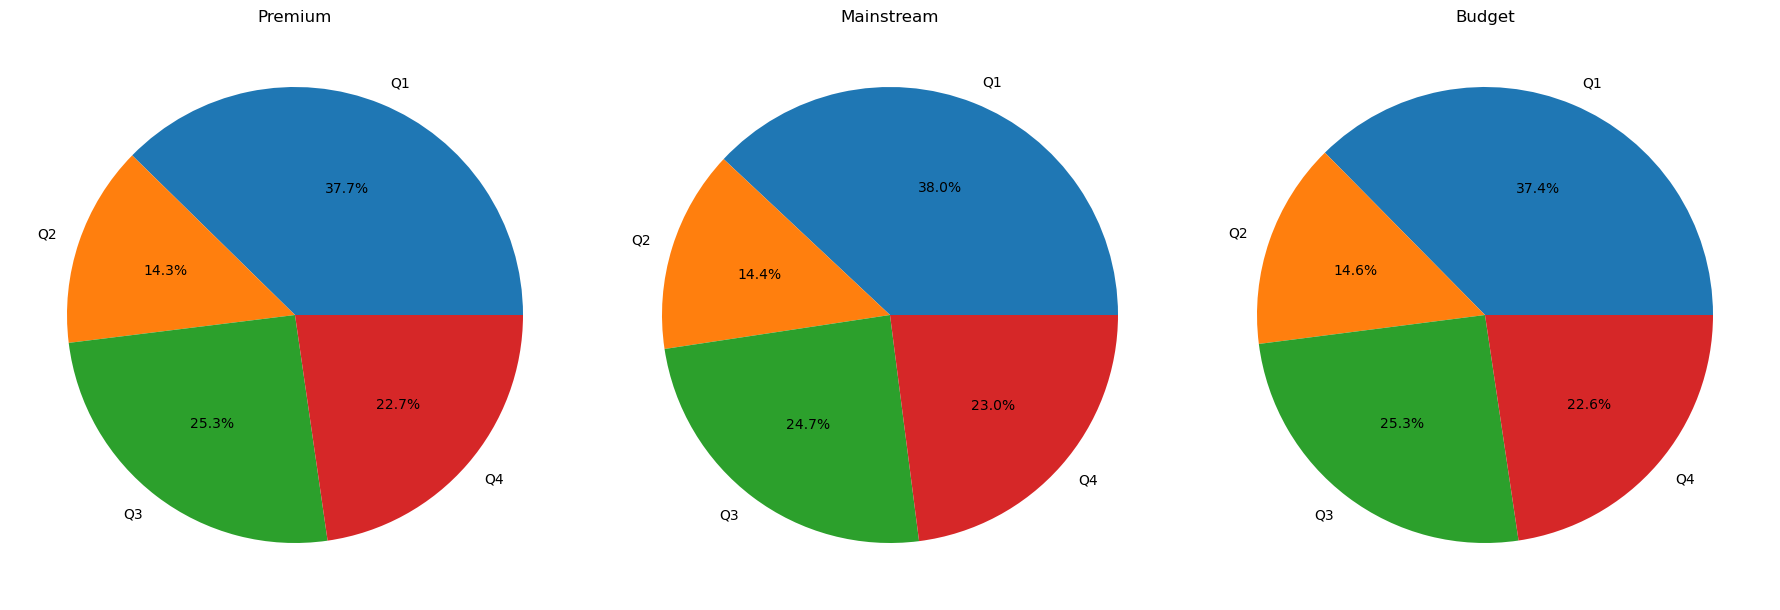

In [170]:
customer_quartile_df_customers = customer_quartile_df.groupby("PREMIUM_CUSTOMER")
customer_quartile_df_customers = customer_quartile_df_customers["WEIGHT_QUARTILE"].value_counts()
customer_quartile_df_customers_unstack = customer_quartile_df_customers.unstack()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
segments = customer_quartile_df["PREMIUM_CUSTOMER"].unique()
for i, segment in enumerate(segments):
    data = customer_quartile_df[customer_quartile_df["PREMIUM_CUSTOMER"] == segment]["WEIGHT_QUARTILE"].value_counts().sort_index()
    data.plot(
        kind='pie',
        autopct='%1.1f%%',
        ylabel='',
        ax=axes[i],
        title=segment
    )
plt.tight_layout()
plt.show()

Topic 3 Analysis:

Price Distribution
* The price distribution is evenly distributed among customer's premium status. All customers show similar purchasing behavior when segmented by price quartiles.
* Even premium customers, typically assumed to prioritize quality over cost, demonstrate similarly toward value.
* These findings imply that price sensitivity is a general trend among all customer types, not just budget conscious ones. Future promotions could focus on highlighting value, even for higher tier items.

Weight Distribution
* The weight distribution is evenly distributed among customer's premium status. All customers have similar purchasing behavior when segmented by weight quartiles.
* The largest distribution of items sold are the lightest items. From previous observations, these items are smaller snacks which are cheaper and easily consumable.
* Products that are slightly below average (Q2) are the least purchased. This may be caused by higher price, too small to share with a group, or too much for a single person to purchase. This trend suggests that the store manager should either purchase items that are smaller in size or larger.